# Run ensemble simulation in loop

In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from runmfpt import runmfpt

In [16]:
runmfpt()

alpha = 0.1
D = 2
gamma = 1
dt = 0.1
minDt = 0
eta = 0.1
T = 5000
t0 = 0
x0 = 5
y0 = 5
potential_file = ./input/landscape1.csv
potential_file_second = ./input/landscape2.csv
kmr1 = 90
kmr2 = 100
kr1 = 10
kr2 = 20
seed = 48981
Ntraj = 1
Whole single trajectory will be printed as the output.
Running the simulation...

-------------launch_2D_1traj_potential_file()-----------
potential_file=./input/landscape1.csv
potential_file_second=./input/landscape2.csv
landscape_state_prev.t=0 switching_times.front()=3.35461
Simulation stopped at:
X: 91
Y: 16
Z: -694.56
Output written to STDOUT.
Done.




In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from settings import init
from types import SimpleNamespace
from fpt_helpers import get_fpt_mean_sd

params=init()
n = SimpleNamespace(**params)
data=[]
for n.alpha in np.arange(n.alpha_min,n.alpha_max,n.alpha_step):
    # print(f"alpha={n.alpha:.2e}")
    output_data_file=f"outT{n.T1:.0e}N{n.Ntraj1:.0e}dt{n.dt1:.0e}alpha{n.alpha:.2e}_ensemble.csv"
    mean_fpt, sd_fpt=get_fpt_mean_sd(output_path=n.output_dir+output_data_file)
    data.append([n.alpha, mean_fpt,sd_fpt])

mfptdf=pd.DataFrame(data, columns=['alpha', 'mean_fpt','sd_fpt'])
mfptdf

FileNotFoundError: [Errno 2] No such file or directory: './output/outT5e+03N1e+00dt1e-01alpha1.00e-01_ensemble.csv'

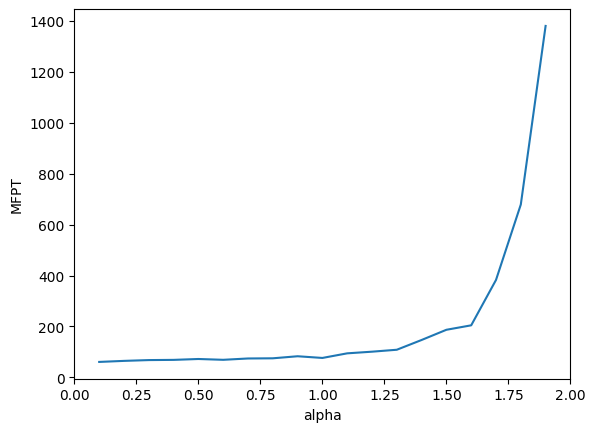

In [10]:
fig,ax=plt.subplots(1,1)
ax.plot(mfptdf['alpha'],mfptdf['mean_fpt'])
ax.set_xlabel('alpha')
ax.set_ylabel('MFPT')
ax.set_xlim((0,2))
plt.show()

In [19]:
import pandas as pd
df=pd.read_csv('./output/out_test.csv')
df

,cumul,number
0,0.00000,6.59499
1,6.59499,2.58756
2,9.18254,8.23570
3,17.41820,15.08030
4,32.49860,7.71274
...,...,...
478,4914.20000,12.65690
479,4926.85000,2.70648
480,4929.56000,20.14320
481,4949.70000,42.07760


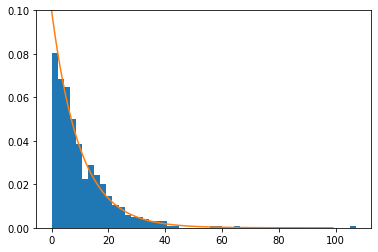

In [26]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax=plt.subplots(1,1)
plt.hist(df['number'], bins=50, density=True)
x=np.arange(0.,100.,1)
y=(1/10.)*np.exp(-x/10.)
plt.plot(x,y)
ax.set_ylim(0,0.1)
plt.show()